# Data

In [1]:
import pandas as pd

df = pd.read_csv('HR.csv')
df.left.value_counts()

0    9821
1    5178
Name: left, dtype: int64

In [2]:
df.left.value_counts() / len(df)

0    0.654777
1    0.345223
Name: left, dtype: float64

In [3]:
y = df['left']
X = df.drop('left', axis=1)
X.shape, y.shape

((14999, 6), (14999,))

In [7]:
df.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.53,2,157,3,0,1,0
1,0.86,5,262,6,0,0,0
2,0.88,7,272,4,0,1,0
3,0.87,5,223,5,0,1,0
4,0.52,2,159,3,0,1,0


# Optimize params

In [9]:
%%time

from xgboost_params_checker import Checker
checker = Checker()
checker.check('xgboost_params_example.json')

CPU times: user 12.7 s, sys: 38.5 ms, total: 12.7 s
Wall time: 12.7 s


('ivanov@gmail.com', 0.7663200640128025)

In [31]:
%%time

from xgboost_params_checker import Checker
checker = Checker()
checker.check('xgboost_params.json')

CPU times: user 384 ms, sys: 8 ms, total: 392 ms
Wall time: 392 ms


('darayavaus.chern@yandex.ru', 0.7817215043008602)

In [6]:
import json 

with open('xgboost_params_example.json', 'r') as f:
    params = json.load(f)
    
params

{'author_email': 'ivanov@gmail.com',
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 1000,
 'min_child_weight': 3,
 'seed': 42}

In [8]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score

estimator = xgb.XGBClassifier(**params)
score = np.mean(cross_val_score(
    estimator, X, y,
    scoring='accuracy', 
    cv=3
))
score

0.7663200640128025

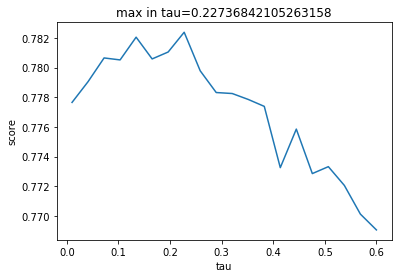

In [24]:
import matplotlib.pyplot as plt

params_copy = params.copy()
scores = []
taus = np.linspace(0.01, 0.6, 20)

for learning_rate in taus:
    params_copy['learning_rate'] = learning_rate
    estimator = xgb.XGBClassifier(**params_copy)
    score = np.mean(cross_val_score(
        estimator, X, y,
        scoring='accuracy', 
        cv=3
    ))
    scores.append(score)
    
plt.plot(taus, scores)
plt.title(f'max in tau={taus[np.argmax(scores)]}')
plt.xlabel('tau')
plt.ylabel('score')
plt.show()

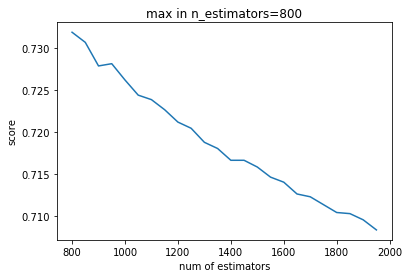

In [16]:
import matplotlib.pyplot as plt

params_copy = params.copy()
scores = []
n_estm = np.arange(800, 2000, 50)

for n_estimators in n_estm:
    params_copy['n_estimators'] = n_estimators
    estimator = xgb.XGBClassifier(**params_copy)
    score = np.mean(cross_val_score(
        estimator, X, y,
        scoring='accuracy', 
        cv=3
    ))
    scores.append(score)
    
plt.plot(n_estm, scores)
plt.title(f'max in n_estimators={n_estm[np.argmax(scores)]}')
plt.xlabel('num of estimators')
plt.ylabel('score')
plt.show()

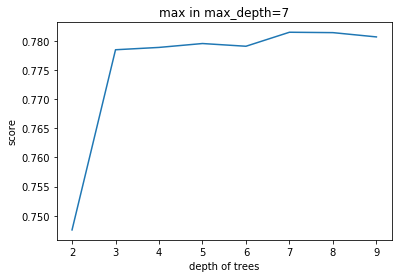

In [21]:
import matplotlib.pyplot as plt

params_copy = params.copy()
scores = []
depths = np.arange(2, 10, 1)

for max_depth in depths:
    params_copy['max_depth'] = max_depth
    estimator = xgb.XGBClassifier(**params_copy)
    score = np.mean(cross_val_score(
        estimator, X, y,
        scoring='accuracy', 
        cv=3
    ))
    scores.append(score)
    
plt.plot(depths, scores)
plt.title(f'max in max_depth={depths[np.argmax(scores)]}')
plt.xlabel('depth of trees')
plt.ylabel('score')
plt.show()

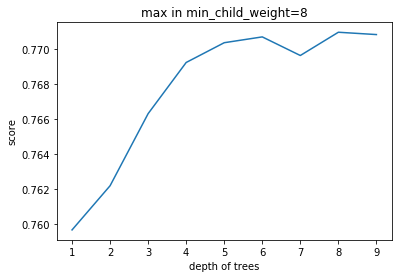

In [9]:
import matplotlib.pyplot as plt

params_copy = params.copy()
scores = []
weights = np.arange(1, 10, 1)

for min_child_weight in weights:
    params_copy['min_child_weight'] = min_child_weight
    estimator = xgb.XGBClassifier(**params_copy)
    score = np.mean(cross_val_score(
        estimator, X, y,
        scoring='accuracy', 
        cv=3
    ))
    scores.append(score)
    
plt.plot(weights, scores)
plt.title(f'max in min_child_weight={weights[np.argmax(scores)]}')
plt.xlabel('depth of trees')
plt.ylabel('score')
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'learning_rate':np.linspace(0.05, 0.7, 10), 
    'max_depth':[2, 3, 4, 5, 6, 7, 8],
    'n_estimators': np.arange(5, 100, 10),
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=3, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0.05      , 0.12222222, 0.19444444, 0.26666667, 0.33888889,
       0.41111111, 0.48333333, 0.55555556, 0.62777778, 0.7       ]),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],


In [12]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.12222222222222222, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=None, n_estimators=25, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Simple GB 

In [1]:
%%time
from gb_impl_checker import Checker
checker = Checker()
checker.check('mygb_darayavaus.py')

CPU times: user 3.04 s, sys: 315 ms, total: 3.36 s
Wall time: 2.82 s


('darayavaus.chern@yandex.ru', 0.776918450356738)

In [4]:
from mygb_darayavaus import SimpleGB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

df = pd.read_csv('HR.csv')
df.left.value_counts()
y = df['left']
X = df.drop('left', axis=1)

clf = SimpleGB({'max_depth': 4}, 1000, 0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.788